
# Section III a - Feature Extraction and Linear Regression

### Filter Methods

#### Part A -  Feature Extraction
The following feature extraction stragetices are common to performing data science. For this project, Principal Component Analysis was successful performed while Linear Discriminant Analysis and Kernal PCA required a more powerful CPU. Even though the project was run on a fairly power desktop with the GPU being utilized, these two feature extraction technique does not utilize the processing power of the GPU and therefore resulted in memory errors.   

* **Principal Component Analysis** — In PCA, new independent variables are extracted from the dataset that explain the most variance. It does so without needing analyzing the dependent variable. This is an unsupervised model. A common strategy is to reduce the number of principal components to just two and visualize the data. Even though we need to reduce our number of features, we do not use PCA for this analysis. Instead we will use Linear Discriminant Analysis. Since Logistic Regressions require a linear discriminant built into their function. We ran PCA with 10, 20, and 50 principal components. 

* **Linear Discriminat Analysis** — Unlike the PCA, which extracts features that explain the most variance, LDA extracts new independent variables that separate the most classes of dependent variable. Since the dependent variable is considered, LDA is a supervised dimensionality reduction model. We keep on getting memory errors when running a Linear Discriminant Analysis on the full dataset. The algortihm was reviously tested on a slice of the data which performed properly.

* **Kernal PCA** — The previous two feature extraction techniques works for models that are linearly separatable. Kernal PCA can be used for non linearly separateable data. It is kernealized version of PCA where we map the data into a higher dimension using the kernal trick and from there we extract new principal components. Because of the higher dimensionality, we ran into memory errors. 

#### Part B -  Multiple Linear Regression
Multipe Linear Regressions are an extension of Linear regressions. We use the multiple linear regression as our baseline model to compare the other regression models. Ideally, we would like to feed our entire list of features into our multiple regression model, but due to computational constraints we will only feed it the principal components we selected from earlier.   

Pros: Multiple Linear Regressions works on all dataset sizes and also gives interpretable results. 

Cons: Certain assumptions must be met in order for results to have any meaning and can easily be biased by outliers.  

In [1]:
import numpy as np   #Mathematics library
import matplotlib.pyplot as plt # for plotting
import pandas as pd  #manage datasets
import seaborn as sea

The FinishMissing.csv file is an output from the missing data appendix where every feature had a speicif strategy to deal with the missing values

In [2]:
# Import the csv file created from our data wrangling.
df = pd.read_csv('FinishMissing.csv')
df=df.drop('Unnamed: 0',axis=1)
df.shape

(90811, 52)

#### Outliers
Outliers can cause high bias into our model. For our model, we will drop outliers. In this case, we will define an outlier as any value that is two standard deviation away from the mean. 

In [3]:
#Drop outliers before splitting ex and y
avg = df['logerror'].mean()
std = df['logerror'].std()
upper_outlier = avg + 2*std
lower_outlier = avg - 2*std
print('upper', upper_outlier)
print(lower_outlier)
print(std)
print(avg)
#round up to drop outliers, til reasonable
df=df[ df.logerror > -0.32 ]
df=df[ df.logerror < 0.34 ]

upper 0.3373916901448827
-0.31575874699922946
0.16328760928602803
0.01081647157282662


In [4]:
df.shape

(88113, 52)

#### Dummy Variables
A Dummy variable or Indicator Variable is an artificial variable created to represent an attribute with two or more distinct categories/levels. The panda "get_dummies" below creates as many dummy variables that is needed for specific feature. It also automatically drops the original feature as well as avoids the dummy variable trap by dropping the first category of that feature. 

In [5]:
###############Create Dummy variables for Categorical data
df=pd.get_dummies(df,columns=['taxdelinquencyflag','fireplaceflag','propertyzoningdesc','propertycountylandusecode','hashottuborspa','airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertylandusetypeid','regionidcounty','regionidcity','regionidzip','regionidneighborhood','storytypeid','typeconstructiontypeid','month','day'],drop_first=True)

#Change dataframe name to help check track of major changes to dataset
dataset=df

In [6]:
#split into response and features
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:,1].values


### Train / Test Split
Andrew Ng, former head of Google's A.I, believes that size of the test set should be enough to give a high confidence. If we had 1 million instances, a 2% test split would be sufficient. We have approximately ~72,000 instances so we will stay closer to the more standard split and set aside 25% of the data to our test set. 

In [7]:
###################### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Feature Scaling
Feature scaling helps future algoritms run faster. Some algorithms require feature scaling while the logistic regression does not. Depending on the size of the dataset, we may not need to feature scale. Feature scaling makes our model less interpretable, although we can inverse transform to return to our original scale. 

In [8]:
##################### Feature Scaling required for Neural Network & Feature Extraction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



## Part A: Feature Extraction,  PCA (n=10)

#### Principal Component Analysis (PCA)
In PCA, new independent variables are extracted from the dataset that explain the most variance. It does so without needing analyzing the dependent variable. This is an unsupervised model. A common strategy is to reduce the number of principal components to just two and visualize the data. Even though we need to reduce our number of features, we do not use PCA for this analysis. Instead we will use Linear Discriminant Analysis. Since Logistic Regressions require a linear discriminant built into their function. 

In [9]:
##### DIMENSIONALITY REDUCTION : PRINCIPAL COMPONENT ANALYSIS(PCA)
# Applying PCA * requires feature scaling
from sklearn.decomposition import PCA
pca = PCA(n_components = 10) # number of principal components explain variance, use '0' first
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X = np.concatenate((X_train,X_test),axis=0)

## Part B:  Multiple Linear Regression
Multipe Linear Regressions are an extension of Linear regressions. As such, there are assumptions that must be satisfied before a linear regression can be used. These assumptions are Linearity, Homoscedasticity, Multivariate normality, Independence of errors, Lack of Multicollinearity. 

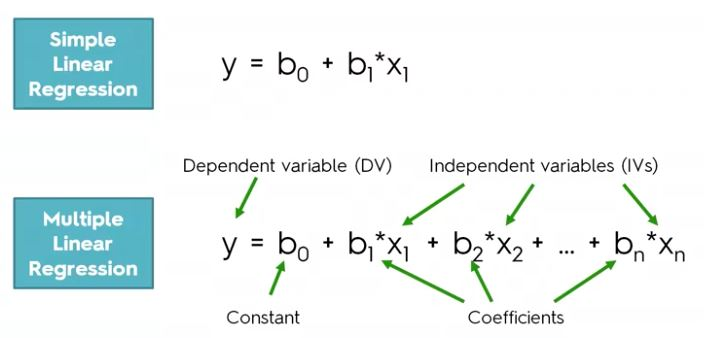

In [5]:
from IPython.display import Image
Image(filename='./images/a1.jpg', width=500)
# Image source @superdatascience.com

In [10]:
#############from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred.mean()

0.0068905364423211928

In [11]:
########### MEAN SQUARED ERROR

# Mean Square Error Train/Test Splt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print(mse)
rmse = np.sqrt(mse)
print(rmse)


0.00580271744083
0.0761755698425


### k-Fold Cross Validation
Sometimes we run into the variance problem. The variance problem occurs when we rerun our models again but recieve a different accrucay than our previous model. The k -fold solves this problem by splitting our training and test set into many folds; ten being the most common split. 

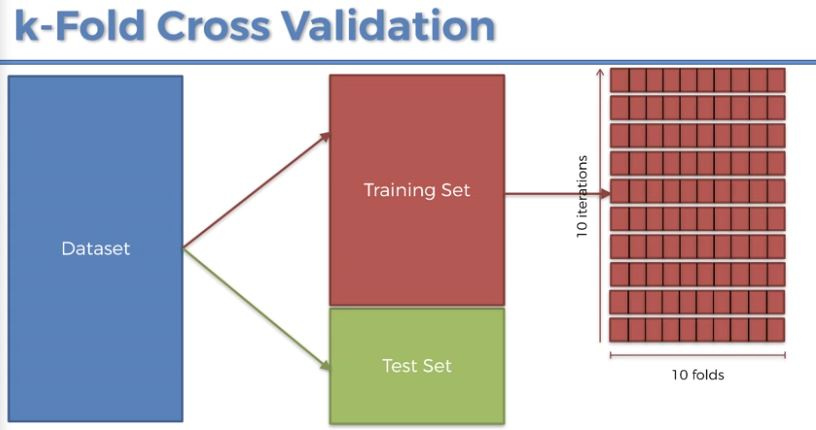

In [3]:
from IPython.display import Image
Image(filename='./images/03.jpg', width=500)
# Image source @superdatascience.com

In [12]:
# 10-fold cross-validation with all three features
###For Feature Extraction Run codes below before cross validation

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
# calculate the average MSE
print(mse_scores.mean())
rmse_kfold = np.sqrt(mse_scores.mean())
print(rmse_kfold)

C:\Users\ceribrum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.00580476773241
0.0761890263254


## (repeat) Part A: Feature Extraction ,  PCA (n=20)

In [13]:
#Change dataframe name to help check track of major changes to dataset
dataset=df

In [14]:
#split into response and features
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:,1].values


In [15]:
###################### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [16]:
##################### Feature Scaling required for Neural Network & Feature Extraction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [17]:
##### DIMENSIONALITY REDUCTION : PRINCIPAL COMPONENT ANALYSIS(PCA)
# Applying PCA * requires feature scaling
from sklearn.decomposition import PCA
pca = PCA(n_components = 20) # number of principal components explain variance, use '0' first
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X = np.concatenate((X_train,X_test),axis=0)

 ## (repeat) Part B:  Multiple Linear Regression


In [18]:
#############from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred.mean()

0.0068865298194490847

In [19]:
########### MEAN SQUARED ERROR

# Mean Square Error Train/Test Splt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print(mse)
rmse = np.sqrt(mse)
print(rmse)


0.00579823774621
0.0761461604167


In [20]:
# 10-fold cross-validation with all three features
###For Feature Extraction Run codes below before cross validation

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
# calculate the average MSE
print(mse_scores.mean())
rmse_kfold = np.sqrt(mse_scores.mean())
print(rmse_kfold)

0.00580513085919
0.076191409353


## (repeat) Part A: Feature Extraction, , PCA (n=50)

In [21]:
#Change dataframe name to help check track of major changes to dataset
dataset=df

In [22]:
#split into response and features
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:,1].values


In [23]:
###################### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [24]:
##################### Feature Scaling required for Neural Network & Feature Extraction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [25]:
##### DIMENSIONALITY REDUCTION : PRINCIPAL COMPONENT ANALYSIS(PCA)
# Applying PCA * requires feature scaling
from sklearn.decomposition import PCA
pca = PCA(n_components = 50) # number of principal components explain variance, use '0' first
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X = np.concatenate((X_train,X_test),axis=0)

## (repeat) Part B:  Multiple Linear Regression


In [26]:
#############from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred.mean()

0.0068824697128085045

In [27]:
########### MEAN SQUARED ERROR

# Mean Square Error Train/Test Splt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print(mse)
rmse = np.sqrt(mse)
print(rmse)


0.0057947743086
0.0761234149825


In [28]:
# 10-fold cross-validation with all three features
###For Feature Extraction Run codes below before cross validation

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
# calculate the average MSE
print(mse_scores.mean())
rmse_kfold = np.sqrt(mse_scores.mean())
print(rmse_kfold)

0.00580627280677
0.0761989029237
